In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.N = 0


    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_estimate = self.p_estimate + (1/self.N) * (x - self.p_estimate)

In [3]:
# the probability of the reward in each bandit
Bandit_prob = [0.2, 0.5, 0.75, 0.6, 0.85]

In [4]:
def experiment(n_iter, Eps):
    """Evaluate the bandit over a number of trials."""
    bandits = [Bandit(p) for p in Bandit_prob]
    rewards = np.zeros(n_iter)

    for i in range(n_iter):
        if np.random.random() < Eps:
            j = np.random.randint(len(Bandit_prob))
        else:
            j = np.argmax( [ b.p_estimate  for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(n_iter) + 1)
    return cumulative_average

# Evaluation

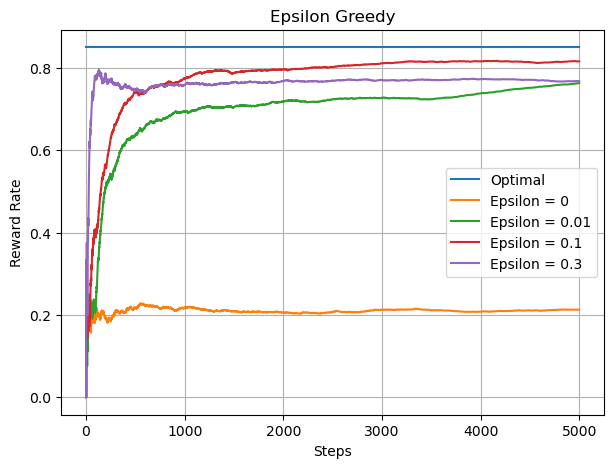

In [8]:
Eps = [0, 0.01, 0.1, 0.3] # Epsilon values
n_iter = 5000 # Number of iterations
plt.figure(figsize=(7, 5))
plt.plot([0, n_iter], [max(Bandit_prob), max(Bandit_prob)], label='Optimal')
for eps in Eps:
    reward_rate = experiment(n_iter, eps)
    plt.plot(reward_rate, label='Epsilon = ' + str(eps))
    plt.xlabel('Steps')
    plt.ylabel('Reward Rate')
    plt.title('Epsilon Greedy')
    plt.grid(True)
    plt.legend()